# Graph Analysis Techniques without Feature Learning

# Classification with graphs

## Lab 4 : Graph SVM 

### Xavier Bresson


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML_May23_codes/codes/03_Traditional_GML/02_classification'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_purity
from lib.utils import compute_SVM

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data matrix X = NON-linearly separable data points
mat = scipy.io.loadmat('datasets/data_twomoons_graphSVM.mat')
Xtrain = mat['Xtrain']
Cgt_train = mat['Cgt_train'] - 1; Cgt_train = Cgt_train.squeeze()
l_train = mat['l'].squeeze()
nb_labeled_data_per_class = mat['nb_labeled_data_per_class'].squeeze()
n = Xtrain.shape[0]
d = Xtrain.shape[1]
nc = len(np.unique(Cgt_train))
print(n,d,nc)
print('nb_labeled_data_per_class=',nb_labeled_data_per_class)
Xtest = mat['Xtest']
Cgt_test = mat['Cgt_test'] - 1; Cgt_test = Cgt_test.squeeze()

500 2 2
nb_labeled_data_per_class= 1


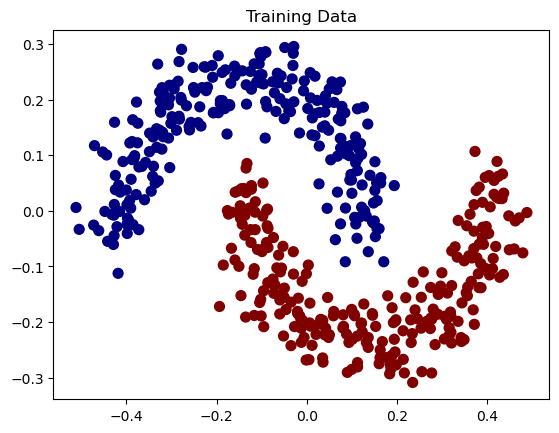

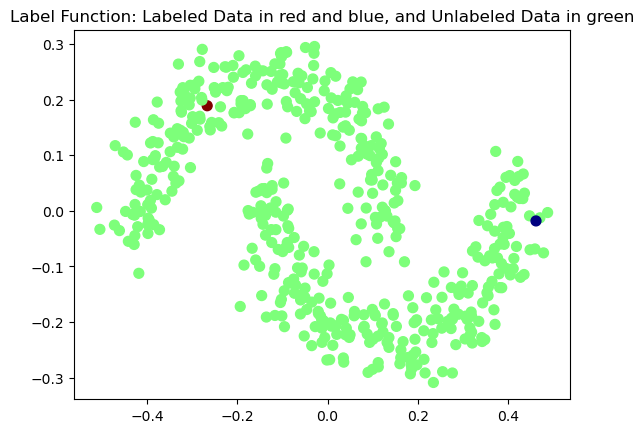

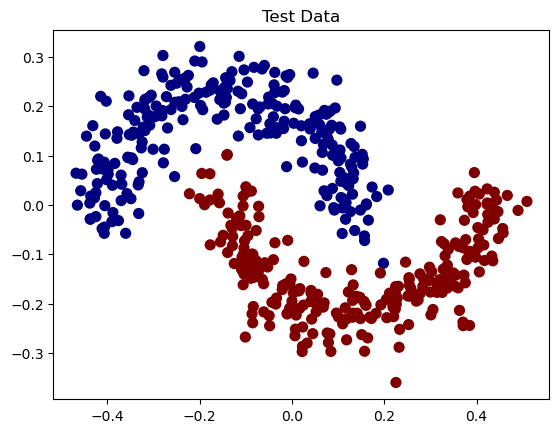

In [4]:
plt.figure(1)
size_vertex_plot = 50
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_train, color=pyplot.jet())
plt.title('Training Data')
plt.show()

plt.figure(2)
size_vertex_plot = 50
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=l_train, color=pyplot.jet())
plt.title('Label Function: Labeled Data in red and blue, and Unlabeled Data in green')
plt.show()

plt.figure(3)
plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_test, color=pyplot.jet())
plt.title('Test Data')
plt.show()

Run Linear SVM
Construct Linear Kernel


<Figure size 640x480 with 0 Axes>

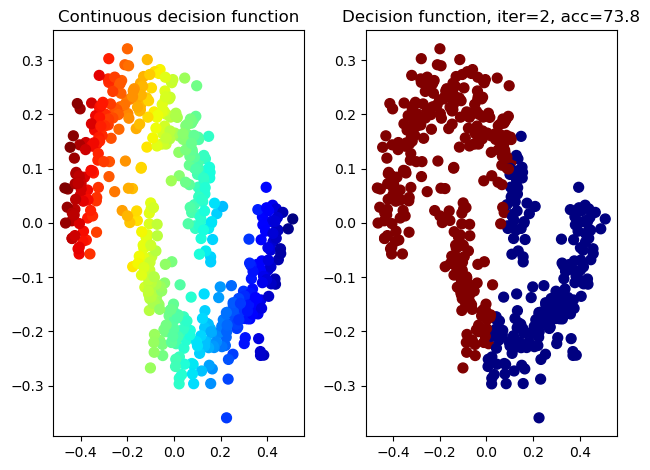

In [5]:
# Run soft SVM
_,_,_,_ = compute_SVM(Xtrain,Cgt_train,l_train,'soft_linear',[1.0],Xtest,Cgt_test,[4,50])

Run Kernel SVM
Construct Gaussian Kernel


<Figure size 640x480 with 0 Axes>

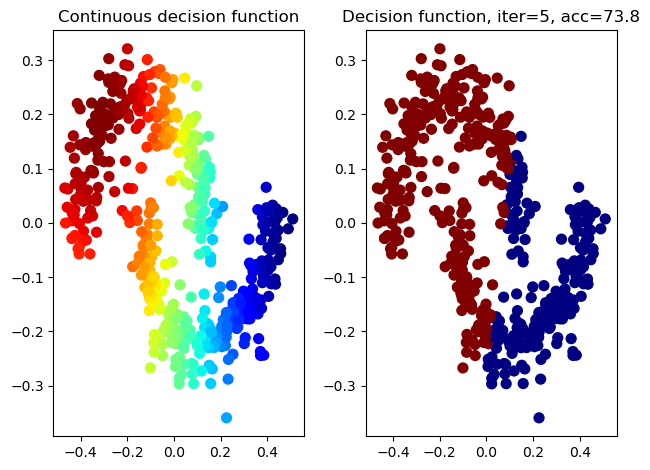

In [6]:
# Run Kernel SVM
_,_,_,_ = compute_SVM(Xtrain,Cgt_train,l_train,'gaussian_kernel',[1.0,0.5],Xtest,Cgt_test,[5,50])

Run Graph SVM with Gaussian Kernel
Construct Gaussian Kernel
k-NN graph with euclidean distance


<Figure size 640x480 with 0 Axes>

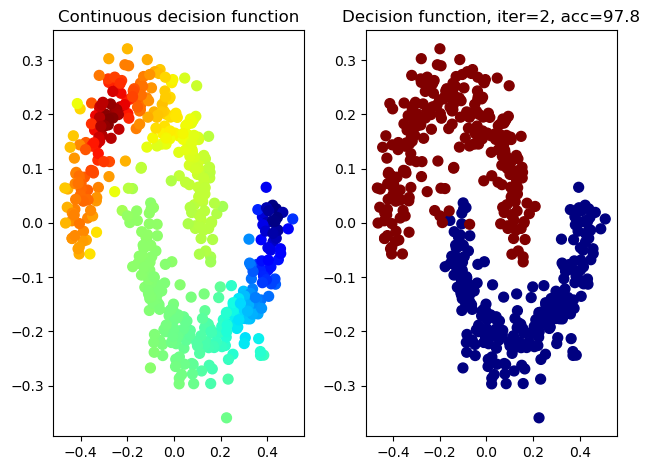

In [7]:
# Run Graph SVM
_,_,_,_ = compute_SVM(Xtrain,Cgt_train,l_train,'gaussian_kernel',[1.0,0.114],Xtest,Cgt_test,[6,50],
                     'euclidean',[10,24.0])